### In this file I am attempting to answer a few questions about my music listening patterns over the years

#### Question 1: 
What type of music do I gravitate towards (across audio features like acousticness, dancibility, etc.) on average? Do my most listened songs have similar features?

#### Question 2: 
What are my all time top artists and how does this compare to my current top artists

#### Question 3: 
What are my all time top songs and how does this compare to my current top songs

#### Question 4: 
What are my all time top genres and how have my tastes evolved over the years?

##### I do this using these dataframes
- artists_with_genres.csv: df containing all of the artists I have listened to and their associated genres and total minutes played
- songs_with_audio_features: df containing all of the songs I have listened to and audio features and total minutes played
- stream.csv: df containing all of my instances of listening to songs organized by the date and time listened
generated in preprocessing.ipynb using downloaded spotify data and information retrived using the SPotify API


In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib.pyplot as plt
import numpy as np
import math

#### Question 1: 
What type of music do I gravitate towards (across audio features like acousticness, dancibility, etc.) on average? Do my most listened songs have similar features?

In [2]:
stream = pd.read_csv('stream.csv')
stream_with_audio_features = pd.read_csv('stream_with_audio_features.csv')
stream['ts'] = pd.to_datetime(stream['ts'])

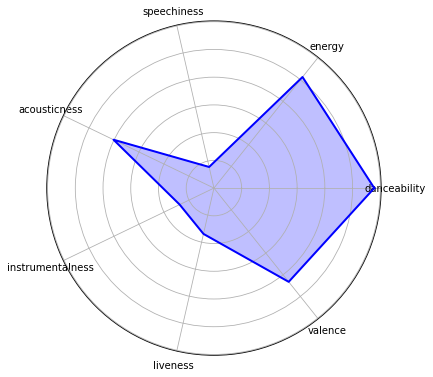

danceability        0.578207
energy              0.512369
speechiness         0.078115
acousticness        0.402051
instrumentalness    0.137236
liveness            0.169518
valence             0.432440
dtype: float64


In [3]:
# Calculate the mean of the audio features 
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
means = stream_with_audio_features[audio_features].mean()

# Creating a radar chart
labels=np.array(audio_features)
stats=means.values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
stats=np.concatenate((stats,[stats[0]]))
angles+=angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='blue', alpha=0.25)
ax.plot(angles, stats, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.show()

print(means)

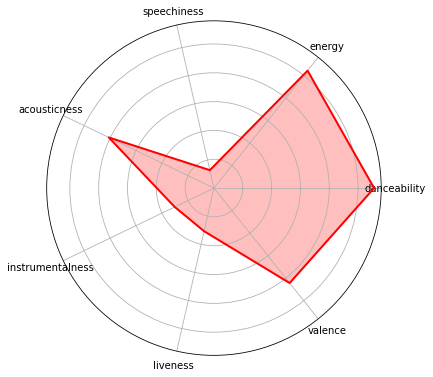

[0.55577289 0.52117045 0.06379567 0.40517486 0.15100149 0.15352322
 0.42140758 0.55577289]


In [4]:
# To increase the impact of the weights (total_mins), we can apply a transformation to the weights
transformed_weights = stream_with_audio_features['total_mins'] ** 2

# Recalculate the weighted averages with the transformed weights
transformed_weighted_avgs = {}
for feature in audio_features:
    transformed_weighted_avgs[feature] = np.average(stream_with_audio_features[feature], weights=transformed_weights)

# Convert the weighted averages dictionary to a list for the radar chart
transformed_weighted_stats = np.array(list(transformed_weighted_avgs.values()))

# Append the first value to the end to close the radar chart loop
transformed_weighted_stats = np.concatenate((transformed_weighted_stats, [transformed_weighted_stats[0]]))

# Create the radar chart with transformed weighted averages
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, transformed_weighted_stats, color='red', alpha=0.25)
ax.plot(angles, transformed_weighted_stats, color='red', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.show()
print(transformed_weighted_stats)

#### Questions 2 and 3: 
What are my all time top artists and how does this compare to my current top artists

What are my all time top songs and how does this compare to my current top songs

In [5]:
# Creating a new df that groups by 'track name', 'artist name', 'album name', 'uri'
# and sums the 'mins_played'
songs = stream.groupby(['track name', 'artist name', 'album name', 'uri'])['mins_played'].sum().reset_index()
songs.rename(columns={'mins_played': 'total_mins'}, inplace=True)

songs.sort_values(by='total_mins', ascending=True, inplace=True)
songs.reset_index()
songs


,track name,artist name,album name,uri,total_mins
7227,Hands On,Kanye West,JESUS IS KING,spotify:track:7r6aR2f57resC5r93LwMfK,0.000000
15107,Sastanàqqàm,Tinariwen,Elwan,spotify:track:3qd6kWpXeX5SMvVuiS9qBY,0.000000
15097,Sappho,Frankie Cosmos,Next Thing,spotify:track:5DIGt883aHs3KqWSziy4gR,0.000000
15049,Sam,Meat Puppets,Forbidden Places,spotify:track:36UDI4VPxbHzTEuvrOTH7V,0.000000
6319,Friendship,Chris Stapleton,From A Room: Volume 2,spotify:track:2ZAqfeq7PMp7XA2IKhuJJ2,0.000000
...,...,...,...,...,...
1042,Amor de Siempre,Cuco,wannabewithu,spotify:track:6VZg3YsN5kKBwz39fPcIM1,404.622600
614,Acolyte,"Slaughter Beach, Dog",Birdie,spotify:track:2h0O3uXZW6ClktlgHWGpjy,463.891183
10505,Lo Que Siento,Cuco,Lo Que Siento,spotify:track:3oyf4dalm17kzTE8LJDbgR,481.645467
19042,Upper West Side,King Princess,Make My Bed,spotify:track:7vfaRUaFBDwENwa3tzJY64,485.726000


In [6]:
songs[songs['total_mins']<0.1]

,track name,artist name,album name,uri,total_mins
7227,Hands On,Kanye West,JESUS IS KING,spotify:track:7r6aR2f57resC5r93LwMfK,0.000000
15107,Sastanàqqàm,Tinariwen,Elwan,spotify:track:3qd6kWpXeX5SMvVuiS9qBY,0.000000
15097,Sappho,Frankie Cosmos,Next Thing,spotify:track:5DIGt883aHs3KqWSziy4gR,0.000000
15049,Sam,Meat Puppets,Forbidden Places,spotify:track:36UDI4VPxbHzTEuvrOTH7V,0.000000
6319,Friendship,Chris Stapleton,From A Room: Volume 2,spotify:track:2ZAqfeq7PMp7XA2IKhuJJ2,0.000000
...,...,...,...,...,...
4978,Drop That #NaeNae,We Are Toonz,Drop That #NaeNae,spotify:track:5raJprQNbc6DlAeRygnDFy,0.099683
7901,Hopeful Horizons,Austin Farwell,Hopeful Horizons,spotify:track:2FPYzUzpQFHgTlqNQONQiE,0.099717
15610,Shoot Love,Maroon 5,V,spotify:track:6urL4lfM0LQe2zGWITrpvP,0.099833
20096,Wind Chimes - Remastered 2001,The Beach Boys,Smiley Smile,spotify:track:0wwtqgvhIsuVHm3rUSLEMk,0.099833


Lots of irrelevent data here

In [7]:
artists = songs.groupby('artist name')['total_mins'].sum().reset_index()
artists.sort_values(by='total_mins', ascending=False,inplace=True)

In [8]:
artists

,artist name,total_mins
4492,"Slaughter Beach, Dog",13484.845167
1122,Cuco,6231.511933
1126,Current Joys,3011.730583
5294,Troye Sivan,2617.128367
2764,King Princess,2522.860717
...,...,...
2794,Kowloon,0.000000
4791,Teenage Fanclub,0.000000
3366,Midlake,0.000000
4949,The House of Love,0.000000


In [9]:
stream.sort_values(by='ts', inplace=True)
start = pd.to_datetime('2023-01-01')
end = pd.to_datetime('2023-12-7')
stream_time_zone = stream['ts'].dt.tz
start = start.tz_localize(stream_time_zone)
end = end.tz_localize(stream_time_zone)

recent = stream[(stream['ts'] >= start) & (stream['ts'] <= end)]
recent.sort_values(by="mins_played", ascending=False,inplace=True)

# Creating a new df that groups by 'track name', 'artist name', 'album name', 'uri'
# and sums the 'mins_played'
recent_songs = recent.groupby(['track name', 'artist name', 'album name', 'uri'])['mins_played'].sum().reset_index()
recent_songs.rename(columns={'mins_played': 'total_mins'}, inplace=True)

recent_songs.sort_values(by='total_mins', ascending=False, inplace=True)
recent_songs.reset_index(inplace=True)
recent_songs.head(10)


/var/folders/yf/0bnr2h912s757f38vzjnzxl40000gn/T/ipykernel_22083/3001390283.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent.sort_values(by="mins_played", ascending=False,inplace=True)


,index,track name,artist name,album name,uri,total_mins
0,3117,Respiration,Black Star,Mos Def & Talib Kweli Are Black Star,spotify:track:5mxVKAuunOKqcBfR5ivbRf,152.513467
1,1208,Everyday,Modern Baseball,Holy Ghost,spotify:track:1VY3mi8wkem9DE02Do3YiO,149.834667
2,644,Cafeína,Samuraï,Cafeína,spotify:track:1vbNbnuw2iPm0hJ6PEpzla,144.213700
3,2378,Medicine,Daughter,Wild Youth,spotify:track:1ujiHGg5p9SVrNIV4jumQK,141.325500
4,182,Alabina - Original 1996,Alabina,The Album of Alabina & Los Niños de Sara,spotify:track:4c9PMOg5YtNzU7o8CYTOmb,140.953633
5,4022,Two Weeks in July,Franz Gordon,In a Bar in Buenos Aires,spotify:track:6r4GdCbJTODZWgLnzehUf6,137.502433
6,4423,como si nada,Kora,fuera de lugar,spotify:track:6FPpGznrt1yeJdttPX32Kv,132.039583
7,2913,Piano Concerto No. 2 Op. 102 in F Major: II. A...,Dmitri Shostakovich,Dmitri Shostakovich: Piano Concertos,spotify:track:46TzngK2DGxxn3yO3gjTGe,122.377533
8,1897,Intersection,Modern Baseball,"Polyvinyl 4-Track Singles Series, Vol. 3",spotify:track:79n6LMR1b5Puu9FxWzxtDA,121.439817
9,3855,The Whole of the Moon - 2004 Remaster,The Waterboys,This Is the Sea,spotify:track:1LzFh1VZ0FLeUesOFEuhyl,118.123850


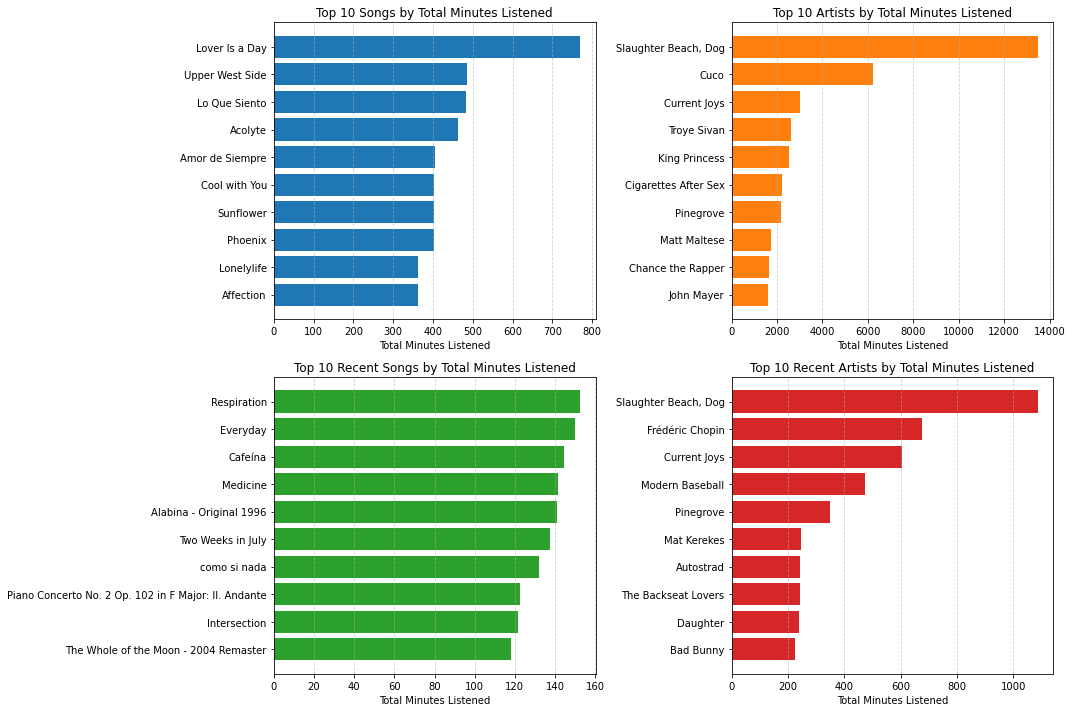

In [10]:
recent_artists = recent_songs.groupby('artist name')['total_mins'].sum().reset_index()
recent_artists.sort_values(by='total_mins', ascending=False,inplace=True)




# Function to create the top 10 total minutes listened plots
def create_top_10_subplot(data, title, subplot_num, color):
    top_10 = data.sort_values(by='total_mins', ascending=False).head(10)
    
    plt.subplot(2, 2, subplot_num)
    plt.barh(top_10['track name' if 'track name' in data.columns else 'artist name'], top_10['total_mins'], color=color)
    plt.gca().invert_yaxis()
    plt.xlabel('Total Minutes Listened')
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

# x2 subplot with custom colors
plt.figure(figsize=(15, 10))

# Colors for the plots
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plots for the top 10 songs, artists, recent songs, and recent artists
create_top_10_subplot(songs, 'Top 10 Songs by Total Minutes Listened', 1, colors[0])
create_top_10_subplot(artists, 'Top 10 Artists by Total Minutes Listened', 2, colors[1])
create_top_10_subplot(recent_songs, 'Top 10 Recent Songs by Total Minutes Listened', 3, colors[2])
create_top_10_subplot(recent_artists, 'Top 10 Recent Artists by Total Minutes Listened', 4, colors[3])

plt.tight_layout()
plt.show()


#### Question 4: 
What are my all time top genres and how have my tastes evolved over the years?

In [11]:
artists_with_genres = pd.read_csv('artists_with_genres.csv')
artists_with_genres

,Unnamed: 0,artist name,mins_played,genres
0,4492,"Slaughter Beach, Dog",13484.845167,"['alternative emo', 'bubblegrunge', 'emo', 'lo..."
1,1122,Cuco,6231.511933,"['bedroom pop', 'dream pop']"
2,1126,Current Joys,3011.730583,"['lo-fi indie', 'pov: indie']"
3,5294,Troye Sivan,2617.128367,"['australian pop', 'pop', 'viral pop']"
4,2764,King Princess,2522.860717,"['alt z', 'indie pop', 'nyc pop']"
...,...,...,...,...
5850,2794,Kowloon,0.000000,[]
5851,4791,Teenage Fanclub,0.000000,"['alternative rock', 'c86', 'modern power pop'..."
5852,3366,Midlake,0.000000,"['austindie', 'chamber pop', 'denton tx indie'..."
5853,4949,The House of Love,0.000000,"['britpop', 'c86', 'dream pop', 'uk post-punk']"


In [12]:
#Get rid of artists with no associated genres
artists_with_genres = artists_with_genres[(artists_with_genres['genres']!="No genre found for this artist") & (artists_with_genres['genres']!="[]")]

/var/folders/yf/0bnr2h912s757f38vzjnzxl40000gn/T/ipykernel_22083/279095349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_with_genres['genres'] = artists_with_genres['genres'].apply(ast.literal_eval)


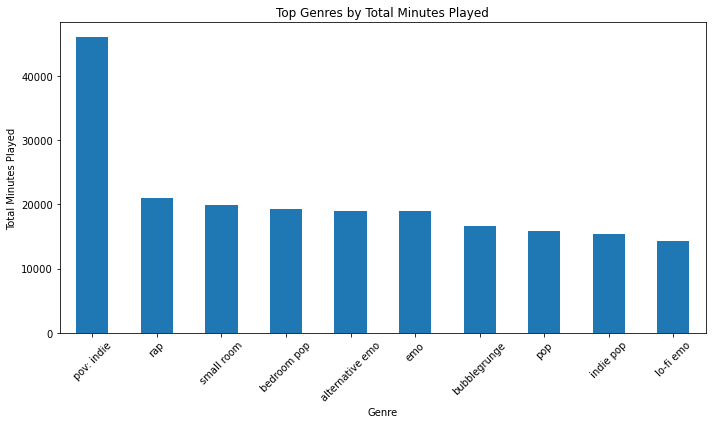

In [13]:
# Convert 'genres' from string representation of list to actual list
import ast
artists_with_genres['genres'] = artists_with_genres['genres'].apply(ast.literal_eval)

# Explode the 'genres' column to get the genres out of the lists
exploded_df = artists_with_genres.explode('genres')

# Group by 'genres' and sum the 'mins_played'
genre_totals = exploded_df.groupby('genres')['mins_played'].sum()

# Sort the values and select top 10 genres for the viz
top_genres = genre_totals.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar')
plt.title('Top Genres by Total Minutes Played')
plt.ylabel('Total Minutes Played')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


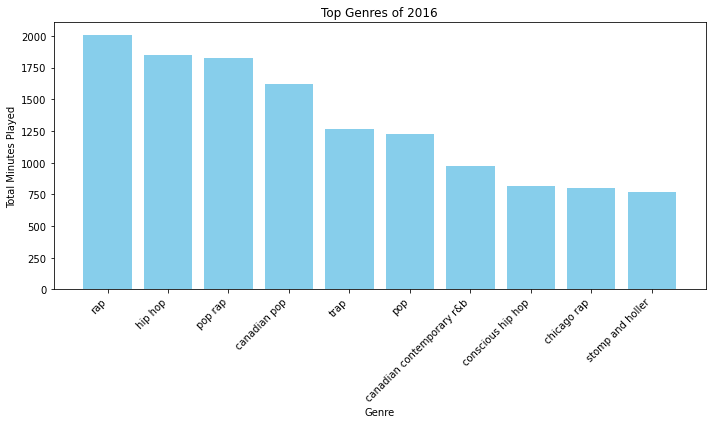

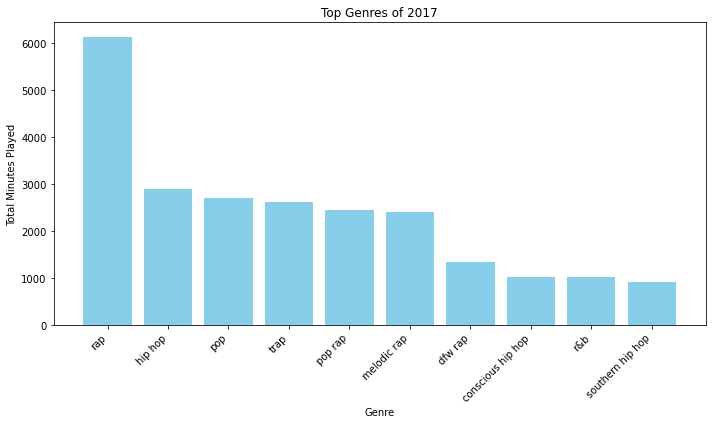

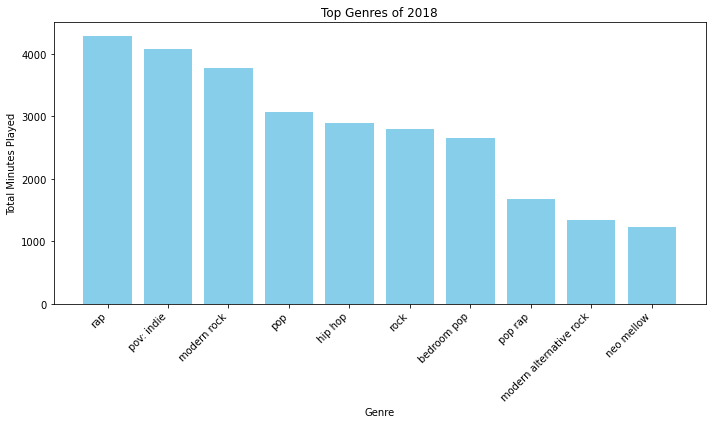

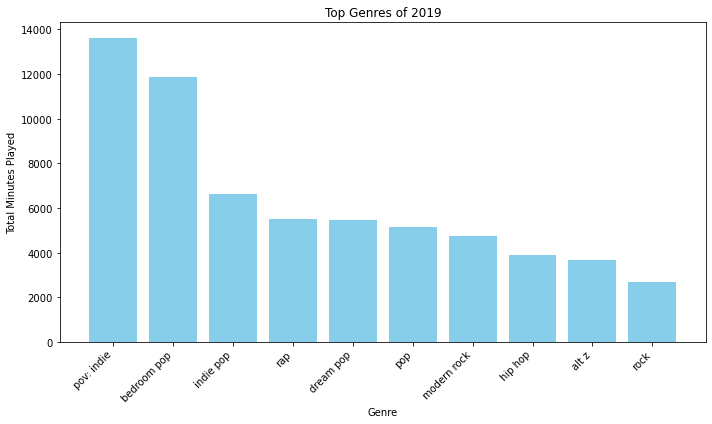

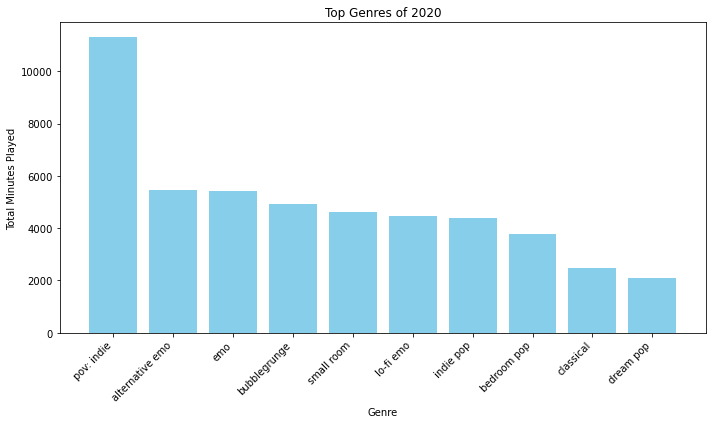

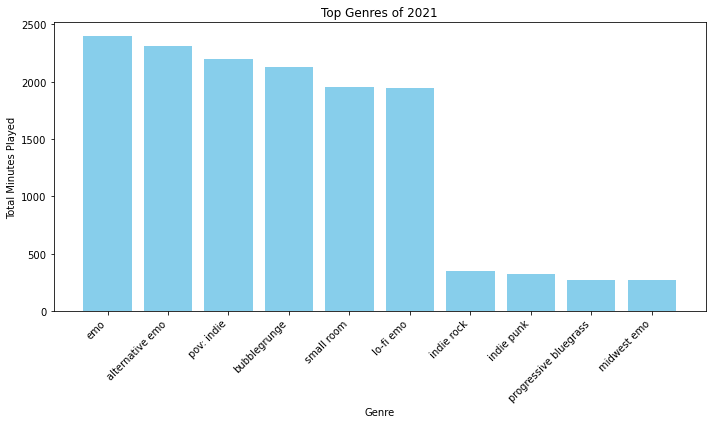

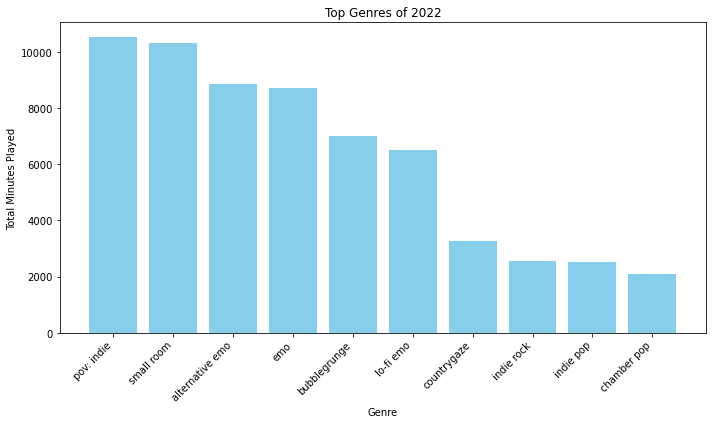

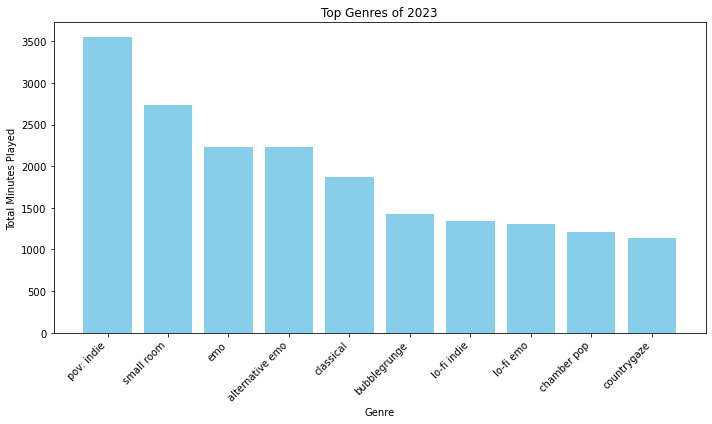

In [14]:
# Create a year column to prepare for by-year plotting
stream['year'] = pd.to_datetime(stream['ts']).dt.year

# Merge the DataFrames on the 'artist name' column
merged_df = pd.merge(stream, artists_with_genres[['artist name', 'genres']], on='artist name', how='left')

# Explode the merged df on the 'genres' column to get the genres out of the lists
merged_df_exploded = merged_df.explode('genres')

# Group by 'year' and 'genres' and sum the 'mins_played', then reset the index
genre_by_year = merged_df_exploded.groupby(['year', 'genres'])['mins_played'].sum().reset_index()

# Loop through each year and plot the top genres by total minutes played
for year in sorted(genre_by_year['year'].unique()):
    genre_year = genre_by_year[genre_by_year['year'] == year]
    top_genres = genre_year.sort_values(by='mins_played', ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    plt.bar(top_genres['genres'], top_genres['mins_played'], color='skyblue')
    plt.title(f'Top Genres of {year}')
    plt.ylabel('Total Minutes Played')
    plt.xlabel('Genre')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
